<a href="https://colab.research.google.com/github/GioLomia/Semantic_Image_Manipulation/blob/master/My_Project/Image_Object_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import tensorflow as tf
import numpy as np
from tkinter import *
import matplotlib
matplotlib.use('Agg')

In [2]:
tf.__version__=2.0
print("Using the TensorFlow Version:", tf.__version__)
from google.colab import drive
drive.mount('/content/drive')

Using the TensorFlow Version: 2.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install gluon
!pip install mxnet
!pip install gluoncv

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/Image_Object_Transfer/images"

# Segmentation Model: Supervised Mask R-CNN

In [0]:
from matplotlib import pyplot as plt
import gluon
from gluoncv import model_zoo, data, utils
from PIL import Image
import numpy as np
import scipy.misc
import imageio
import mxnet

class Segmentor:
    def __init__(self,mask=True,bboxes=False,model_name='mask_rcnn_resnet50_v1b_coco'):
        self.mask=mask
        self.bboxes=bboxes
        self.net = model_zoo.get_model(model_name, pretrained=True)
        self.mask=None
        self.im=None
        
    def read_im(self,path):
        x, orig_img = data.transforms.presets.rcnn.load_test(path)
        
        return x,orig_img
    
    def segment(self,x,orig_img):
        """
        Segments the picture.
        """
        ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in self.net(x)]
        # paint segmentation mask on images directly
        width, height = orig_img.shape[1], orig_img.shape[0]
        #Expand the mask onto the image
        masks = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
        #Plot the mask onto the image
        orig_img = utils.viz.plot_mask(orig_img, masks)
        self.mask=masks
        self.im=orig_img
    def plot_im_with_mask(self):
        """
        Plots the segmented image.
        """
        fig = plt.figure(figsize=(15, 15))
        ax = fig.add_subplot(1, 1, 1)
        ax = utils.viz.plot_mask(self.im, self.mask)
        plt.imshow(ax)
        plt.show()
        return ax


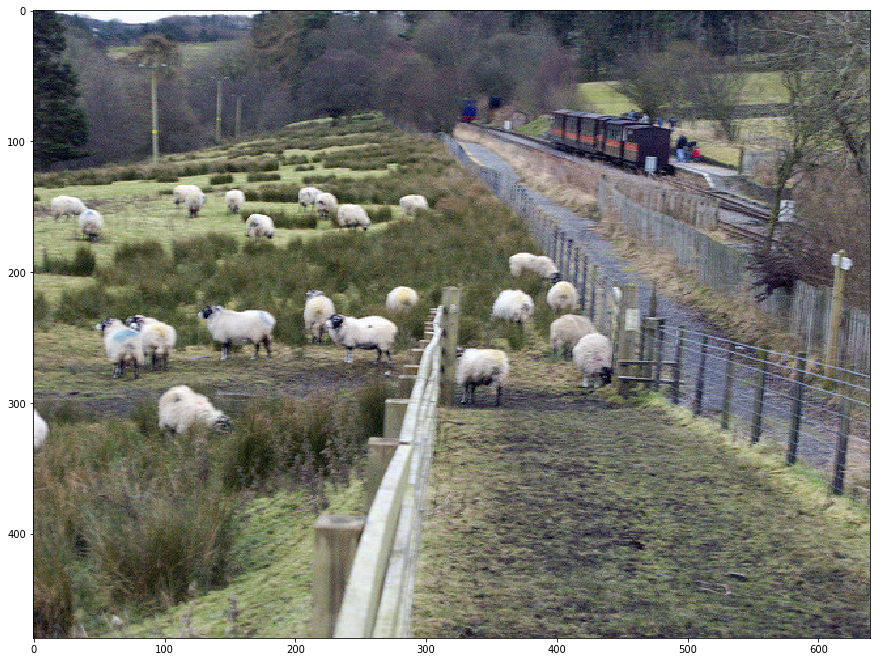

In [9]:
fig2 = plt.figure(figsize=(15, 15))
plt.imshow(Image.open(full_im_path))
plt.show()

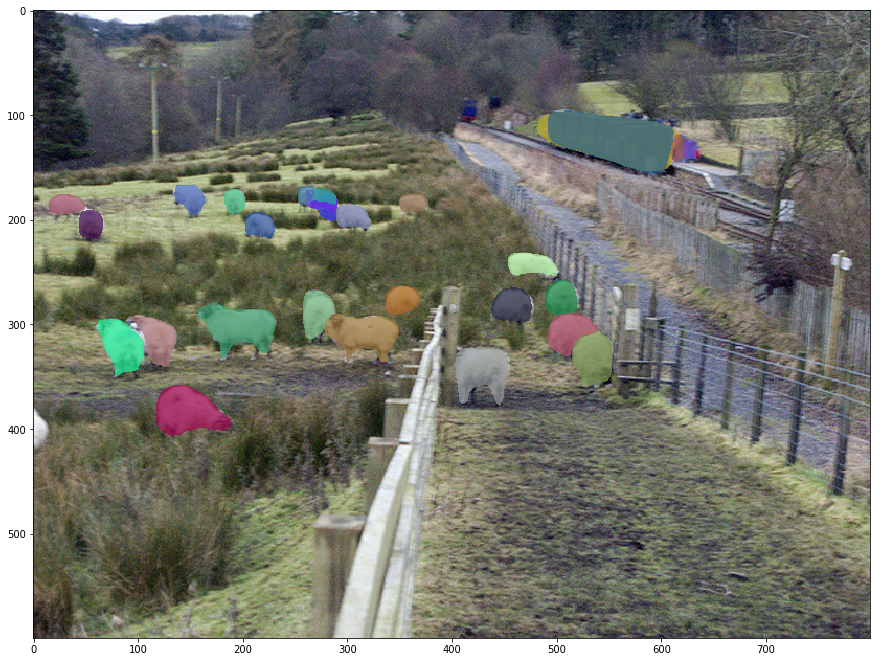

In [10]:
im_dir_path="/content/drive/My Drive/Colab Notebooks/Image_Object_Transfer/images/"
im_name="3132016470_c27baa00e8_z.jpg"

full_im_path=im_dir_path+im_name
seg=Segmentor()

x,im=seg.read_im(full_im_path)
seg.segment(x,im)
masked_im=seg.plot_im_with_mask()


# Doing Semantic Segmentation with Fully-Convolutional Network
Referance: [Image Segmentation With Fully Connected ConvNet](https://medium.com/nanonets/how-to-do-image-segmentation-using-deep-learning-c673cc5862ef)